In [1]:
## NOTEBOOK TO RUN FROM openfoodfacts-ai\nutrition-table-extraction\models_test\TableNet\notebooks ##
import sys
sys.path.append('../lib')
from table_detection import Pipeline, TableMask, Table, process_column_mask, process_line_mask, LineDetection
from tablenet import TableNet
from openfoodfactsimage import *
from utils import *
import cv2
from shutil import copyfile
import os
import numpy as np
import imutils
import tqdm
import json
from utils import *
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100000)
from collections import namedtuple
Rectangle = namedtuple('Rectangle', 'xmin ymin xmax ymax')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [12]:
## NOTEBOOK PARAMETERS ##
model_path = 'C:\\Users\\ytremenbert\\fact-extraction\\TableNet_notebooks\\models\\2021_04_01'
file_path = 'C:/Users/ytremenbert/fact-extraction/TableNet_notebooks/new_data_for_test/'
col_config = {'widnow_size':20,'min_distance_between_peaks':10,'method':'std'} 
line_config = {'widnow_size':20,'min_distance_between_peaks':20,'method':'variance'} # config trouvée dans 3-pipeline.ipynb
img_height, img_width = 1000, 1000

In [13]:
# MODEL AND WEIGHTS LOAD ##
model = TableNet.build()
latest = tf.train.latest_checkpoint(model_path)
model.load_weights(latest)

173it [00:00, 11078.76it/s]


For image =  C:/Users/ytremenbert/fact-extraction/TableNet_notebooks/new_data_for_test/001193de-6c4d-486c-a8d5-3830e99cb1a8-1_cropped.jpg
                                                   0                                              1
0  INFORMATIONS NUTRITIONNELLES VOEDINGSWAARDEN V...  MOYENNES POUR / GEMIDDELDE NÄRINGSVÄRDE PER :
1                                                NaN   100 g 1 part portie / portion ( 400 g ) % AR
2                         Énergie / Energie / Energi     535 kJ 2140 kJ 25 % 128 kcal 512 kcal 26 %
3  Matières grasses / Vetten / Fett dont acides g...            5,9 g 23,4 g 33 % 2,8 g 11,2 g 56 %
4  Glucides / Koolhydraten / Kolhydrat dont sucre...    43,9 g 17 % 3,1 g 12,3 g 14 % g 10,1 g 11 g
5    Protéines / Eiwitten / Protein Sell Zout / Salt             26,3 g 53 % 0,74 2,97 g 49 % 6,6 g
6   * AR = Apport de Référence pour un adulte - type           ( 8400 kJ / 2000 kcal ) / Referentie
7  inname van een gemiddelde volwassene ( 8400 en...          

89it [00:00, 8339.32it/s]


For image =  C:/Users/ytremenbert/fact-extraction/TableNet_notebooks/new_data_for_test/17e2c8a6-5565-44c0-96f1-0cadbea3b64b-1_cropped.jpg
                                                   0                                     1
0  INFORMATIONS NUTRITIONNELLES MOYENNES VOEDINGS...  POUR / GEMIDDELDE NÄRINGSVÄRDE PER :
1                         Énergie / Energie / Energi               100 g 503 kJ , 120 kcal
2  Matières grasses / Vetten / Fett dont acides g...         5 g 0,9 g / varav mättat fett
3  Glucides / Koolhydraten / Kolhydrat dont sucre...                       < 0,5 g < 0,5 g
4               Fibres alimentaires / Vezels / Fiber                               < 0,5 g
5                     Protéines / Eiwitten / Protein                                  19 g
6                                  Sel / Zout / Salt                                0,16 g


99it [00:00, 11610.77it/s]


For image =  C:/Users/ytremenbert/fact-extraction/TableNet_notebooks/new_data_for_test/20210330_165832_cropped.jpg
                                                   0                  1                  2
0  VALEURS NUTRITIONNELLES MOYENNES / GEMIDDELDE ...  Pour / Per 100 ml  Pour / Per 250 ml
1                                  Énergie / Energie     107 kJ 25 kcal     267 kJ 63 kcal
2                          Matières grasses / Vetten              0,1 g               0,39
3  dont acides gras saturés / waarvan verzadigde ...                 Og                 Og
4  Glucides / Koolhydraten dont sucres / waarvan ...        4,8 g 1,3 g          129 3,3 g
5                       Fibres alimentaires / Vezels          1,0 g 0,8          2,5 g 2,0
6                    Protéines / Eiwitten Sel / Zout             0,77 g              1,9 g
7                   Cette brique contient 4 portions      de 250 ml 250                . .


137it [00:00, 19783.09it/s]


For image =  C:/Users/ytremenbert/fact-extraction/TableNet_notebooks/new_data_for_test/22c4c006-5f90-4eca-90ab-48442f415002-1_cropped.jpg
                                                   0                                       1                                   2
0                     INFORMATIONS POUR / GEMIDDELDE         NUTRITIONNELLES VOEDINGSWAARDEN                     MOYENNES VOOR :
1                                                NaN                            100 g 1 part           / portie ( 350 g ) % AR *
2                                  Energie / Energie                    487 kJ 1705 116 kcal                   kJ 20 % kcal 20 %
3  Matières grasses / Vetten dont acides gras sat...                               4,6 g 1,6                    16 g 23 % g 28 %
4               waarvan verzadigde vetzuren Glucides                                     NaN                                16 %
5  Koolhydraten dont sucres / waarvan suikers Fib...                           3,9 g g 1

117it [00:00, 11963.57it/s]


For image =  C:/Users/ytremenbert/fact-extraction/TableNet_notebooks/new_data_for_test/290402.nutrition.cropped2.jpg
                                                   0                   1                                    2
0  Valeurs nutritionnelles moyennes pour / Declar...              100 ml  Une portion / Uma porção ( 200 ml )
1                                  Énergie / Energia  160 kj ( 38 kcal )                   320 kJ ( 76 kcal )
2  Matières grasses / Lípidos dont acides gras sa...          1,8g 0,2 g                           3,6 g 0,4g
3  Glucides / Hidratos de carbono dont sucres / d...   3,8 g < 0,5g 4,9g                      7,59 9,8 g 0,79
4                                                NaN                 NaN                                  NaN


160it [00:00, 12620.38it/s]


For image =  C:/Users/ytremenbert/fact-extraction/TableNet_notebooks/new_data_for_test/40de7d9d-d0ab-43f3-aeab-cc2f3595cec6-1_cropped.jpg
                                                   0                                                  1
0         INFORMATIONS NUTRITIONNELLES MOYENNES POUR                   GEMIDDELDE VOEDINGSWAARDEN PER :
1                                                NaN  100 g 1 cornet / 1 hoorntjel ( 12,5 g ) % AR *...
2                                  Énergie / Energie  1752 kJ 21 % 219 kJ 3 % 415 kcal 21 % 52 kcal 3 %
3  Matières grasses / Vetten dont acides gras sat...           6,2 g 0,5 g 9 % 0,8 g 1 % 4,1 g 21 % 3 %
4  Glucides / Koolhydraten dont sucres / waarvan ...    81 g 31 % 10 g 4 % 28 g 31 % 3,5g 4 % 0,4 g 3,4
5                     Protéines / Eiwitten Sell Zout       15 % 2 % 4 % 0,5 % 7,5 g 0,22 g 0,9 g 0,03 g
6  * AR = Apport de Référence pour un adulte - ty...         kJ / 2000 kcal ) ( 8400 kJ / 2000 kcal ) .


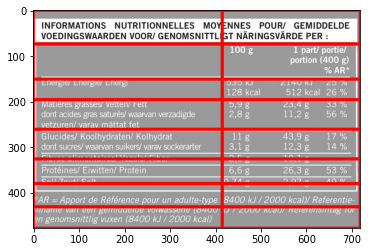

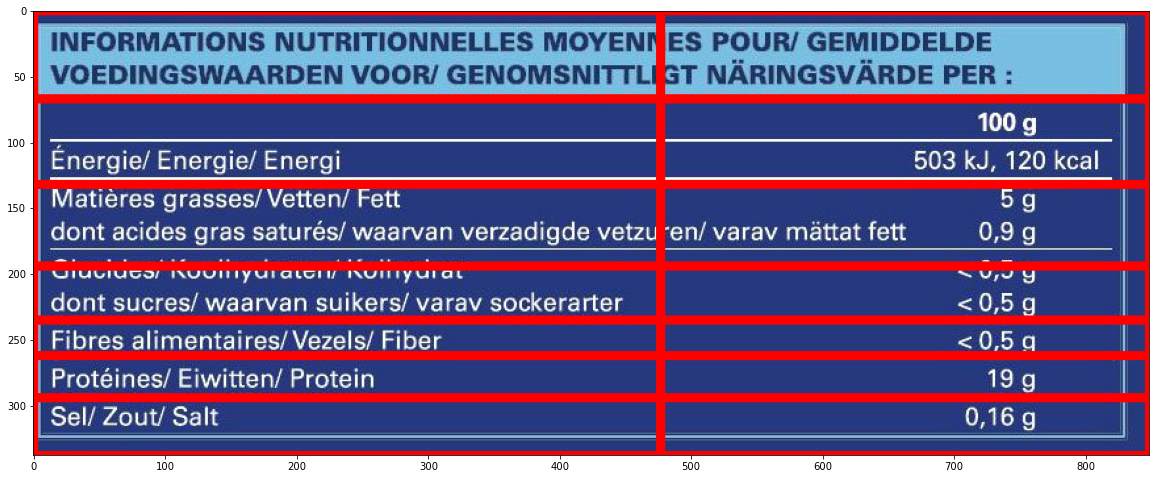

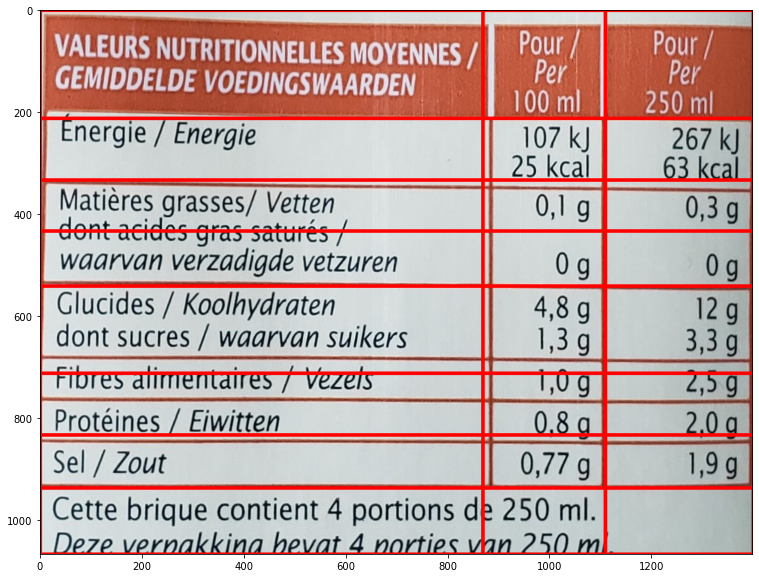

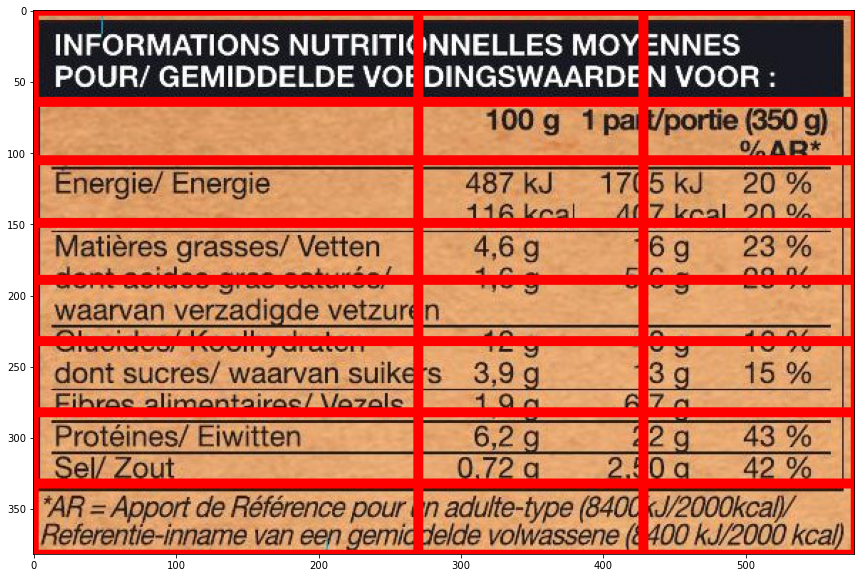

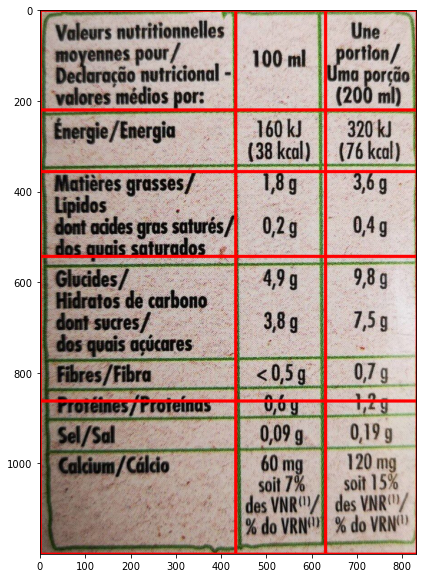

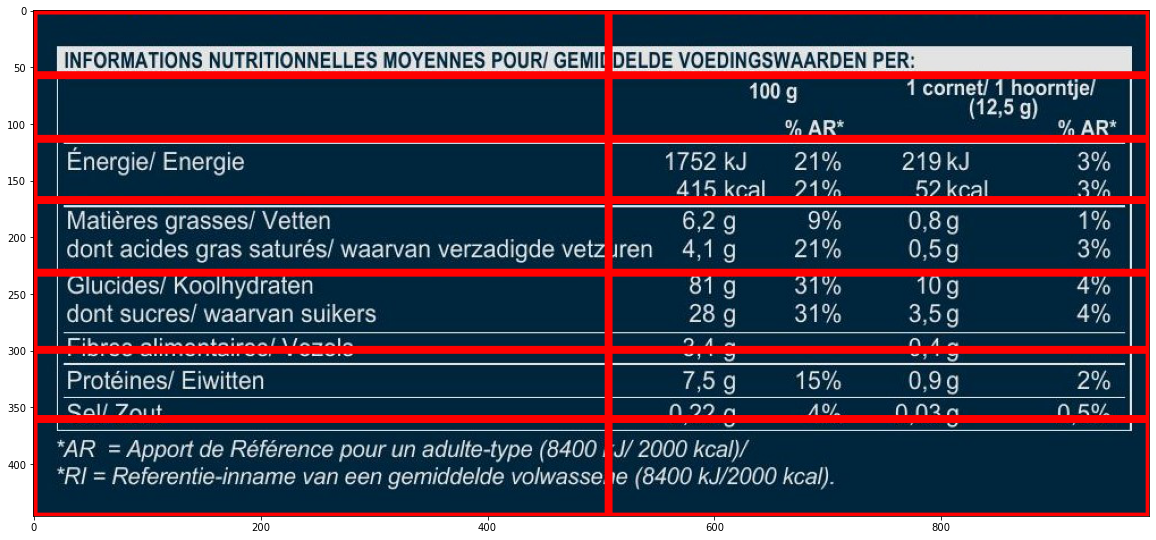

<Figure size 1440x720 with 0 Axes>

In [14]:
## PREDICTIONS PROCESSING OVER IMAGES IN GIVEN FILE + TABLE EXTRACTION ##
paths = [os.path.join(file_path,file) for file in os.listdir(file_path) if file.split('.')[-1]=='jpg']
list_norm = []
for image_path in paths:
    image = plt.imread(image_path)

    #%%time

    pipeline = Pipeline(model,image)
    pipeline.run(0.8)
    table = Table(pipeline.predicted_column_mask,pipeline.predicted_line_mask,image.shape)
    table.find_table(col_config, line_config)
    
    for line in table.table:
        for cell in line:
            cv2.rectangle(image,(cell.xmin,cell.ymin),(cell.xmax,cell.ymax),color=(255,0,0),thickness=5)
    
    mask = table.line_mask.astype(np.uint8)
    
    json_url = image_path.replace('.jpg','.json')
    with open(json_url, encoding='utf8') as file:
        loaded_file = json.load(file)
        ocr_json = loaded_file['textAnnotations'] #loaded_file['responses'][0]['textAnnotations']
        ocr = [Word(description=str(word['description']),
                         bounding_box=word['boundingPoly']['vertices']) for word in ocr_json
                   if all('x' in coordinate.keys() and 'y' in coordinate.keys() for coordinate in word['boundingPoly']['vertices']) and 'locale' not in word.keys()]
    words = ocr.copy() #bounding_boxes -> ocr
    shape = pipeline.images[-1].shape #(338, 849, 3)
    table_shape = (np.array(table.table).shape[0],np.array(table.table).shape[1]) #(2, 6)
    extracted_table = np.empty(shape=table_shape+(0,)).tolist()
    for i, bounding_box in tqdm.tqdm(enumerate(ocr)): #bounding_boxes -> ocr
        try:
            done=False
            word_rect = circumscribed_rectangle(bounding_box.bounding_box)
            word_area = area(word_rect)
            for col_num,col in enumerate(table.table):
                col_x_min = col[0].xmin
                col_x_max = col[0].xmax
                column_rect = Rectangle(col_x_min,0,col_x_max,shape[1])
                inclusion_score = intersection_area(column_rect,word_rect)/word_area
                #print('{} included in col {} with score of {}'.format(ocr[i].description,col_num,inclusion_score))
                if inclusion_score>0.5:
                    for line_num,cell in enumerate(col):
                        inclusion_score = intersection_area(cell,word_rect)/word_area
                        if inclusion_score>0.5:
                            #bounding_boxes[i]['cell']= (line_num,col_num)
                            extracted_table[col_num][line_num].append(ocr[i].description)
                            done=True

                            break
                    if done:
                        break
            if col_num == len(table)-1 and line_num == len(col)-1:
                print(ocr[i].description)

        except KeyboardInterrupt:
            print("Interrupted")
            break
        except:
            words.remove(bounding_box)
            
    a = pd.DataFrame(extracted_table).applymap(lambda x: ' '.join(x)).T.replace('',np.nan)
    print("For image = ", image_path)
    print(a)
    plt.imshow(image)
    plt.figure(figsize=(20,10))
    
    img_decoded = decode_img(tf.io.read_file(image_path))[0]
    img_norm = normalize(img_decoded)
    list_norm.append(img_norm)
    
    
list_ds = tf.data.Dataset.from_tensor_slices(list_norm)

1/1 [==============================] - 1s 557ms/step


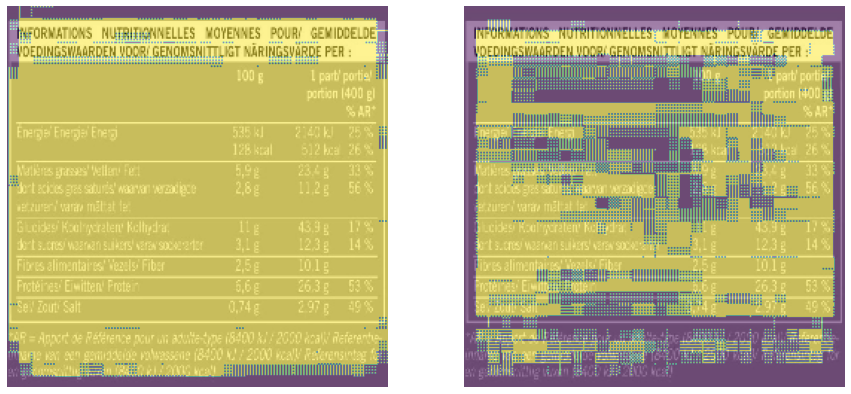

1/1 [==============================] - 1s 529ms/step


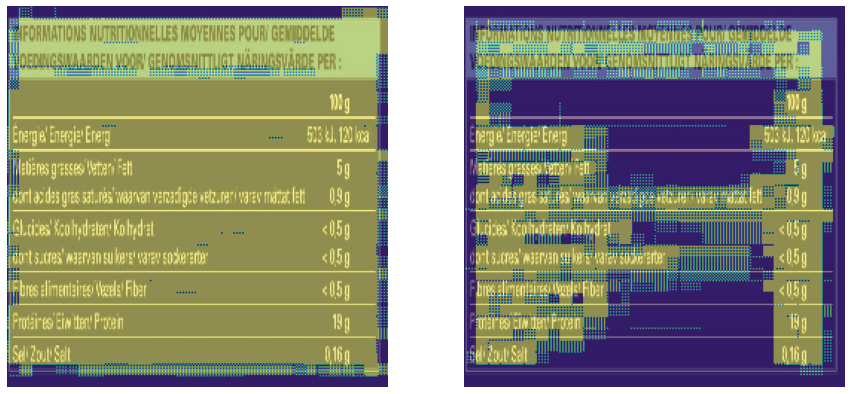

1/1 [==============================] - 1s 565ms/step


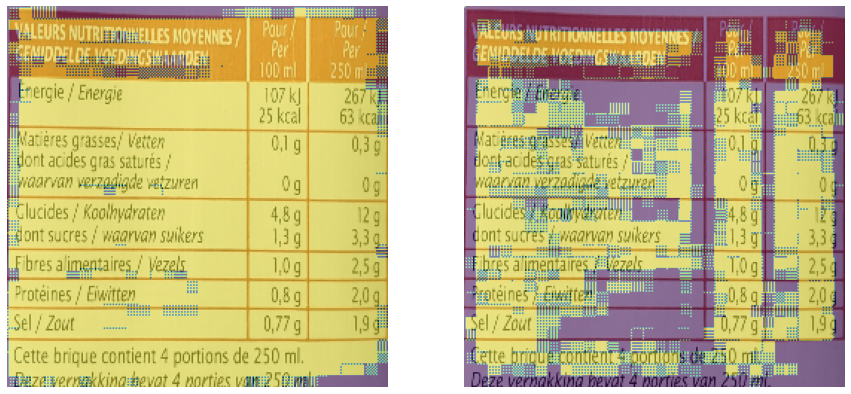

1/1 [==============================] - 1s 557ms/step


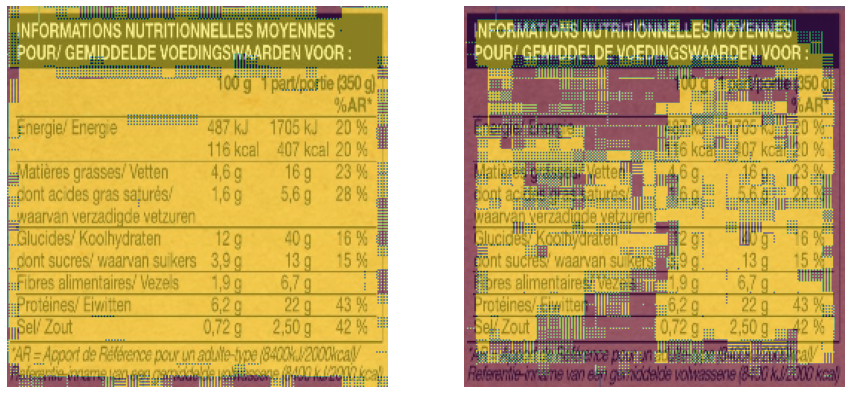

1/1 [==============================] - 1s 536ms/step


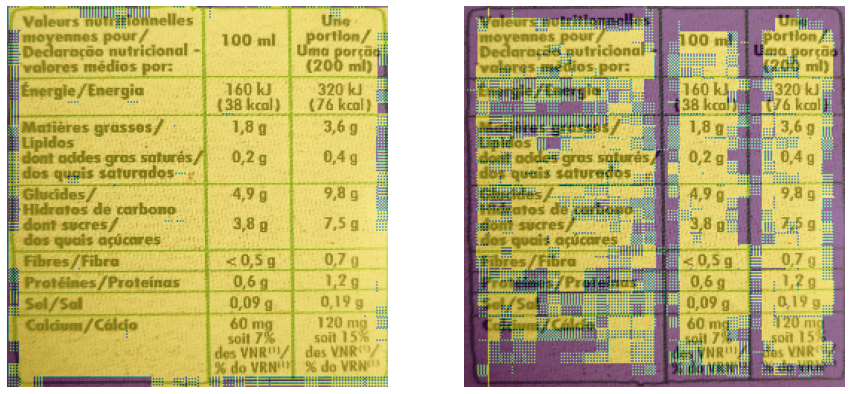

1/1 [==============================] - 1s 543ms/step


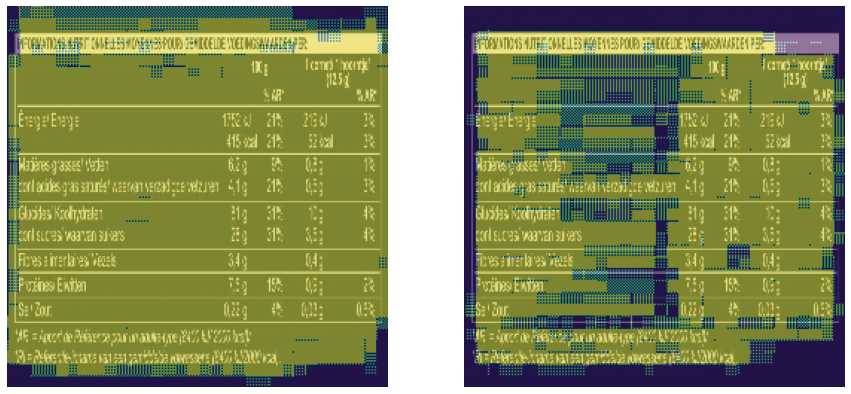

In [15]:
### SHOW MASKS PREDICTIONS ##
test_dataset = list_ds.batch(1)
show_predictions(model, dataset=test_dataset, num=len(test_dataset))